# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I **EDSA-Team_8**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Belief Analysis 2022
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received, Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [25]:
#importing the required libraries
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Customise our plotting settings
sns.set_style('whitegrid')

#Libraries for data cleaning
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

#Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix # Classification report

# Setting global constants to ensure notebook results are reproducible

 <a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

We frist start by loading in our dataset, both the `training` and `testing` dataset is loaded as a pandas dataframe

In [2]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

**Exploratory Data Analysis (EDA) :**  After loading in our dataset we first start with the vital component **EDA** to better understand the dataset we are working with and, to gain insight about the `features` and `labels` by performing `Univariate` or `Multivariate` , `Non-graphical` or `Graphical` Analysis"

We take a look quick look at the first few rows of the `training` and `testing` dataset to have an overview of our features and labels, (using `pd.head()` method)

In [3]:
#The first five columns of the traing dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


After taking a look at the frist five  rows of the dataFrame we can see that we have `Three (3)` columns in the dataFrame.

we have two features and one label

features inludes:

    - message
    - tweetid

label:

    - sentiment
    
And the test dataFrame contains only the features

In [4]:
#The first five columns of the test dataset
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


we will take a look at the shape of the dataframe to understand the amount of data we are working with, the **rows** and the **columns**

In [5]:
#checking the shape of the traing dataframe
train.shape

(15819, 3)

looking at the shape of the dataframe we have `15819` rows and `3` columns

Next up let's take a look at the data types of the dataFrame using `pd.info()`

In [6]:
#checking the information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


looking at the above output we can see that we have two `int64` and one `object` 

In [7]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

well it shows that we have **0** null values in the training data

let's take a closer look on our label `sentiment` 

In [8]:
#checking for unique values 
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Well it looks like we have 4 unique values in our label.

Based on the description of the data here is what each value stands for:

    1 Pro: the tweet supports the belief of man-made climate change
    2 News: the tweet links to factual news about climate change
    0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
    -1 Anti: the tweet does not believe in man-made climate change

let's count and plot the destribution of each unique value

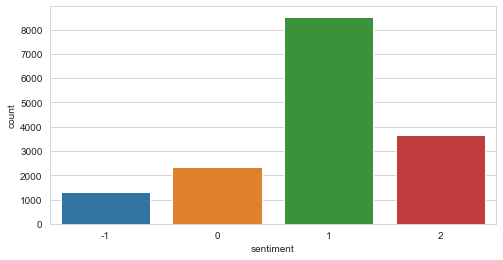

In [9]:
#ploting the destribution of unique label values
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="sentiment", data=train)
plt.show()

**Interpretation**

- The above plot comfirms that:

`1296` tweets do not believe in man-made climate change `-1`

`2353` tweets neither supports nor refutes the belief of man-made climate change `0`

`8530` Pro: the tweet supports the belief of man-made climate change `1`

`3640` News: the tweet links to factual news about climate change `2`

The plot show that the highest propotion of the tweets supports the belife of man-made climate change

Now moving on let's explore our `features` to gain more insight  

In [10]:
#checking the tweetid to see if there are any duplicate id's
train['tweetid'].nunique()

15819

Okay it looks like we don't have a value from the `tweetid`column

Moving on let's take a closer look into the `message` column which contains the tweets

In [11]:
#taking a colser look on the message column
train['message'].head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

Well based on what we are seeing the `message` column which contains the tweets has some punctuation, we need to clean the data


In [12]:
#creating a new dataframe for the features
df = pd.DataFrame(train[['tweetid', 'message']])

In [13]:
#install the wordcloud package using pip
#!pip install WordCloud

**WordCloud Visualization**

We will create a wordcloud to see the high frequency tokens for all the sentiment

(-0.5, 399.5, 199.5, -0.5)

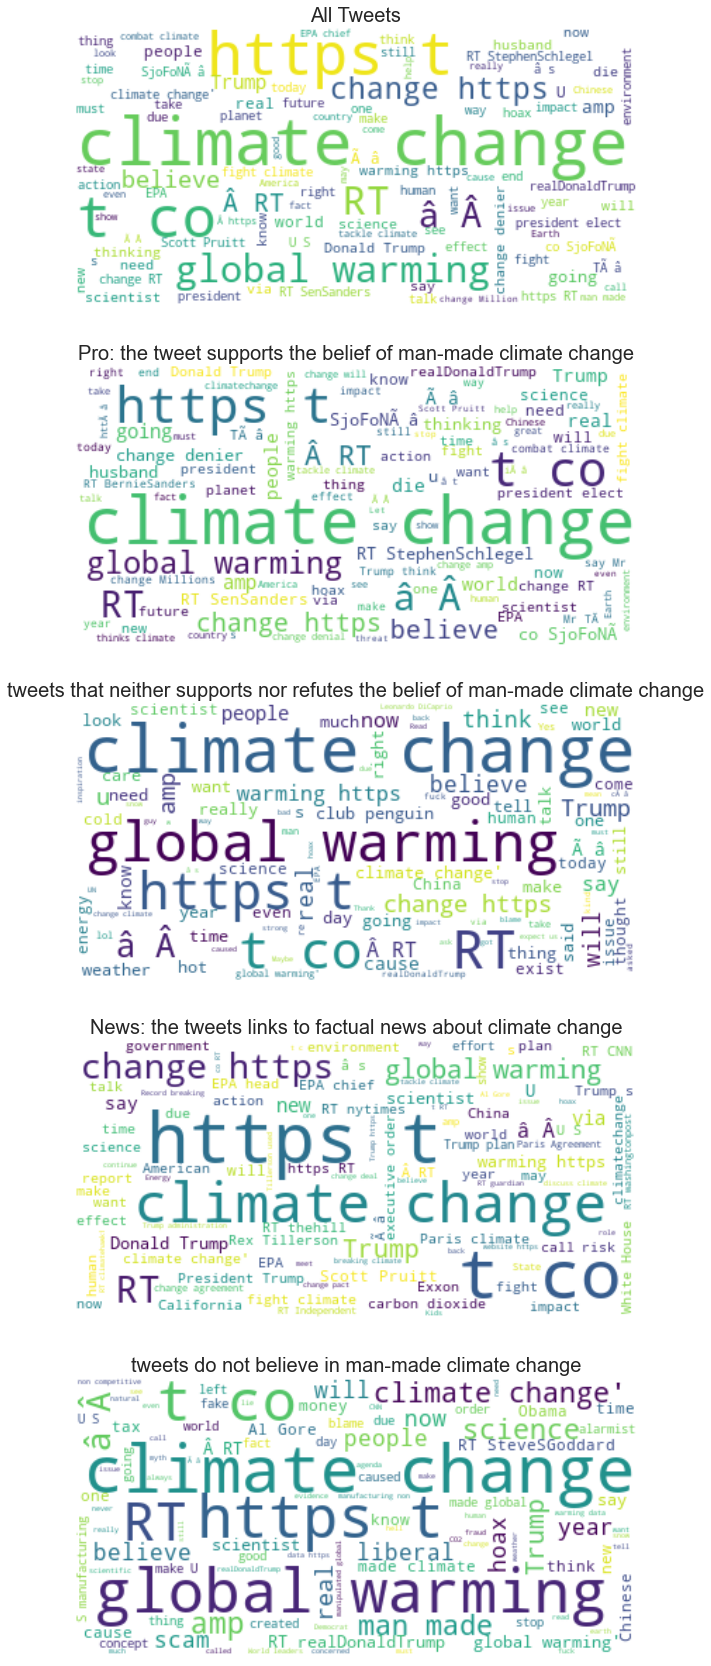

In [14]:
# Start with one review:
#classifying the tweets into it's category class
df_PRO = train[train['sentiment']==1]
df_NSR = train[train['sentiment']==0]
df_NEWS = train[train['sentiment']==2]
df_NPRO = train[train['sentiment']==-1]

#looping through each category of the tweet and joining it as a string
tweet_All = " ".join(review for review in df.message)
tweet_PRO = " ".join(review for review in df_PRO.message)
tweet_NSR = " ".join(review for review in df_NSR.message)
tweet_NEWS = " ".join(review for review in df_NEWS.message)
tweet_NPRO = " ".join(review for review in df_NPRO.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_PRO = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_PRO)
wordcloud_NSR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NSR)
wordcloud_NEWS = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NEWS)
wordcloud_NPRO = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NPRO)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=20)
ax[0].axis('off')
ax[1].imshow(wordcloud_PRO, interpolation='bilinear')
ax[1].set_title('Pro: the tweet supports the belief of man-made climate change',fontsize=20)
ax[1].axis('off')
ax[2].imshow(wordcloud_NSR, interpolation='bilinear')
ax[2].set_title('tweets that neither supports nor refutes the belief of man-made climate change',fontsize=20)
ax[2].axis('off')
ax[3].imshow(wordcloud_NEWS, interpolation='bilinear')
ax[3].set_title('News: the tweets links to factual news about climate change',fontsize=20)
ax[3].axis('off')
ax[4].imshow(wordcloud_NPRO, interpolation='bilinear')
ax[4].set_title('tweets do not believe in man-made climate change',fontsize=20)
ax[4].axis('off')

Taking a look at the above wordcould we can see that we have some few high frequency tokens such as:
`Climate change`and `global warming` in all the cartegories of the tweets

### Next setp is Data cleaning

Before applying any ML model to a set of data we need fisrt check our data to see if the data is in the state data we want it to be or do we need clean the data, well our case we need to clean the data moving on we will start the Data cleaning process.

**Pre-processing text data**

Most of the text data are cleaned by following below steps.

- Remove punctuations
- Tokenization - Converting a sentence into list of words
- Remove stopwords
- Lammetization/stemming - Tranforming any form of a word to its root word

In [15]:
# Remove Punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#Data preprocessing
#function that handles the removal punctuations from the tweets
def remove_punct(text):
    """
    the function remove_punction takes in a text as input and loops through
    the text the to if a char is not in string.punctuation then it adds the 
    the char as a string 
    
    """
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [17]:
#apply the remve_puct func to the tweets column
df['message_punct'] = df['message'].apply(lambda x: remove_punct(x))
df.head()

,tweetid,message,message_punct
0,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesnt think carbon dio...
1,126103,It's not like we lack evidence of anthropogeni...,Its not like we lack evidence of anthropogenic...
2,698562,RT @RawStory: Researchers say we have three ye...,RT RawStory Researchers say we have three year...
3,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,TodayinMaker WIRED was a pivotal year in the...
4,466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",RT SoyNovioDeTodas Its and a racist sexist cl...


The above remove_punct function have removed the punctuations from the tweets and we have added it as a column in the dataframe the `message_punct` column

 <a id="four"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

### CountVectorizer

Next we will be applying CountVectorizer to the newly `massege_punct` column

In [16]:
# Bag-of-words vectors built into sklearn

In [18]:
#using countVectoerizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', analyzer='word')

In [19]:
X_count = vectorizer.fit_transform(df['message_punct'].values.astype(str))

In [20]:
#vectorizer.get_feature_names()

In [28]:
X_count.shape

(15819, 32231)

In [29]:
# Extraxt features to help predict the label 
X = X_count.toarray()

In [30]:
# Determine our Label
y = train['sentiment']

In [31]:
# Split Data (into Training & Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

## TEST DATA PREPROCESSING

In [ ]:
test_df = pd.DataFrame(test[['tweetid', 'message']])

In [ ]:
#applying the remove punctuation funtion to the test data
test_df['message_punct'] = test_df['message'].apply(lambda x: remove_punct(x))
df.head()

In [ ]:
test_count = vectorizer.transform(df['message_punct'].values.astype(str))

In [ ]:
X_test = test_count.toarray()

 <a id="five"></a>
## 5. Modeling
<a href=#cont>Back to Table of Contents</a>

In [26]:
#models
svc = SVC(kernel='sigmoid')
clf = DecisionTreeClassifier(random_state=0)

In [35]:
#fitting the models
svc.fit(X_train, y_train)
clf.fit(X_train, y_train)

 <a id="six"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

In [17]:
# Evaluate trained model using the test set
# Generate predictions
#y_svc_test = svc.predict(X_test)
y_clf_test = clf.predict(X_test)

In [ ]:
type_labels = ['-1','0','1','2']

In [ ]:
print(classification_report(y_test, y_clf_test, target_names=type_labels))

 <a id="seven"></a>
## 7. Model Explanations
<a href=#cont>Back to Table of Contents</a>